In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap


rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')


In [2]:
raw_data = pd.read_csv('missepagefound.csv')

raw_data

,Benchmark,TotalMiss,FoundInL1,FoundInSameSEL1,FoundInL1ButNotInL2,Found In L1,FoundInSameSEL1.1,FoundInL1ButNotInL2.1
0,mt,288512,125902,36065,107918,0.436384,0.125003,3.740503e-01
1,mm,4893575,3354113,2281626,1699834,0.685412,0.466249,3.473604e-01
2,km,3539645,1847947,1667825,1032930,0.522071,0.471184,2.918174e-01
3,st,1228032,709550,245350,590795,0.577794,0.199791,4.810909e-01
4,pr,3820757,3111300,1528338,1797080,0.814315,0.400009,4.703466e-01
5,spmv,3541513,2865236,1260299,2108224,0.809043,0.355865,5.952891e-01
6,flw,16294160,15450764,14156270,8,0.948239,0.868794,4.909730e-07
7,fir,71157,32273,14118,0,0.453546,0.198406,0.000000e+00
8,sc,1422,913,598,0,0.642053,0.420534,0.000000e+00
9,bs,192376,101432,92896,0,0.527259,0.482888,0.000000e+00


In [3]:
stacked_data = raw_data


stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['Found In L1','FoundInSameSEL1.1','FoundInL1ButNotInL2.1'])

stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
#stacked_data = stacked_data.sort_values(['Benchmark'])
stacked_data.columns = ['Benchmark', 'Configuration', 'MissPercentage']
stacked_data.MissPercentage *= 100
stacked_data = stacked_data.reset_index()
stacked_data

,index,Benchmark,Configuration,MissPercentage
0,0,MT,Found In L1,43.638393
1,1,MM,Found In L1,68.541159
2,2,KM,Found In L1,52.207128
3,3,ST,Found In L1,57.779439
4,4,PR,Found In L1,81.431507
5,5,SPMV,Found In L1,80.904291
6,6,FLW,Found In L1,94.823937
7,7,FIR,Found In L1,45.354638
8,8,SC,Found In L1,64.205345
9,9,BS,Found In L1,52.725912


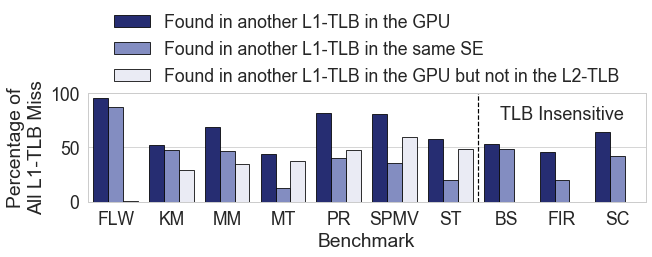

In [5]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='MissPercentage', 
            order=["FLW", "KM", "MM", "MT", "PR", "SPMV", "ST", "BS", "FIR", "SC"], 
            palette=['#1A237E','#7986CB','#E8EAF6'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
labels = ['Found in another L1-TLB in the GPU', 
          'Found in another L1-TLB in the same SE', 
          'Found in another L1-TLB in the GPU but not in the L2-TLB']
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.4), loc="center", ncol=1)
ax.set_ylim(0, 100)
ax.set_ylabel('Percentage of\nAll L1-TLB Miss')


ax.axvline(6.5, 0, 1, c='k', ls='--')
ax.text(8, 80, 'TLB Insensitive',  horizontalalignment='center', verticalalignment='center',
        fontsize=18)

plt.savefig('misspercentagefoundinl1.pdf', bbox_inches='tight')
plt.savefig('misspercentagefoundinl1.png', dpi=600, bbox_inches='tight')
plt.show()
plt.close()
